<a href="https://colab.research.google.com/github/vipasanasharma/Automated-Prediction-of-Avalanches/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv ('/content/trainingdata.csv')

df = df.fillna(0)
df.head(20)

,Qs,Qg0,ILWR,LWR_net,ISWR,Qw,pAlbedo,ISWR_diff,TA,TSS_mod,...,zSn,Sn,zSs,Ss,S4,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen,dangerLevel
0,6.689875,1.412750,218.295125,-86.298625,56.894625,6.519625,0.896000,35.768000,0.22500,-2.050000,...,15.739375,0.00000,15.739375,6.000000,6.000000,5.41,3.00,15.510000,4.00,2
1,14.823625,1.089000,214.024500,-62.756625,71.826875,16.826875,0.775375,24.709125,-0.17500,-8.612500,...,28.335000,4.55025,30.122000,0.141125,2.141125,2.34,0.33,16.137946,0.33,2
2,35.341000,4.082000,207.166750,-70.780625,73.285625,8.160625,0.893500,27.304250,-1.18750,-8.250000,...,15.333875,0.00000,15.333875,6.000000,6.000000,6.00,4.00,15.310000,4.00,2
3,15.825250,0.631750,215.945625,-86.913125,53.267375,9.517375,0.821750,30.210000,0.23750,-2.425000,...,25.832625,0.00000,25.832625,6.000000,6.000000,4.16,0.35,16.612166,0.35,1
4,11.049250,2.339125,214.966500,-82.191500,34.447375,3.465250,0.893500,31.141625,-0.29325,-3.722875,...,1.813000,6.00000,8.839750,6.000000,6.000000,6.00,3.00,8.470000,4.00,1
5,-15.006125,0.000000,206.573750,-98.831125,340.126500,301.501500,0.096375,51.278750,-1.63750,-1.800000,...,0.000000,6.00000,0.000000,6.000000,6.000000,0.00,0.00,0.000000,0.00,1
6,33.617250,13.499375,175.220625,-101.760000,27.220375,4.095375,0.829750,26.090875,-1.73750,-8.400000,...,8.357875,0.00000,11.913250,6.000000,6.000000,6.00,3.00,7.476260,3.00,1
7,26.791000,14.240750,175.254000,-80.002500,9.353250,2.228250,0.755125,9.153375,-1.68750,-13.750000,...,1.008000,6.00000,9.254875,6.000000,6.000000,6.00,4.00,9.240000,4.00,1
8,40.351375,1.819125,160.544000,-60.904125,96.495000,14.245000,0.861125,16.040375,-5.31250,-22.962500,...,20.440750,3.27300,45.362875,0.120000,2.120000,2.14,0.39,18.831875,0.39,2
9,-32.176125,0.000000,158.392750,-153.445500,85.506000,81.427625,0.090000,14.767500,-6.20000,-0.150000,...,0.000000,6.00000,0.000000,6.000000,6.000000,0.00,0.00,0.000000,0.00,2


In [3]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:30].values
y = df.iloc[:,30:31].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y = ohe.fit_transform(y).toarray()

from sklearn.model_selection import train_test_split
train_x,X_test,train_y,y_test = train_test_split(X,y,test_size = 0.1)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
history=model.fit(train_x, np.ravel(train_y,order='C'))

In [5]:
model.score(X_test, y_test)

0.7736301369863013

In [7]:
y_predicted = model.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[811, 109,   6,   0,   0],
       [106, 661, 129,   0,   0],
       [ 11, 187, 767,   6,   0],
       [  0,   7,  91,  16,   2],
       [  0,   0,   2,   5,   4]])

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

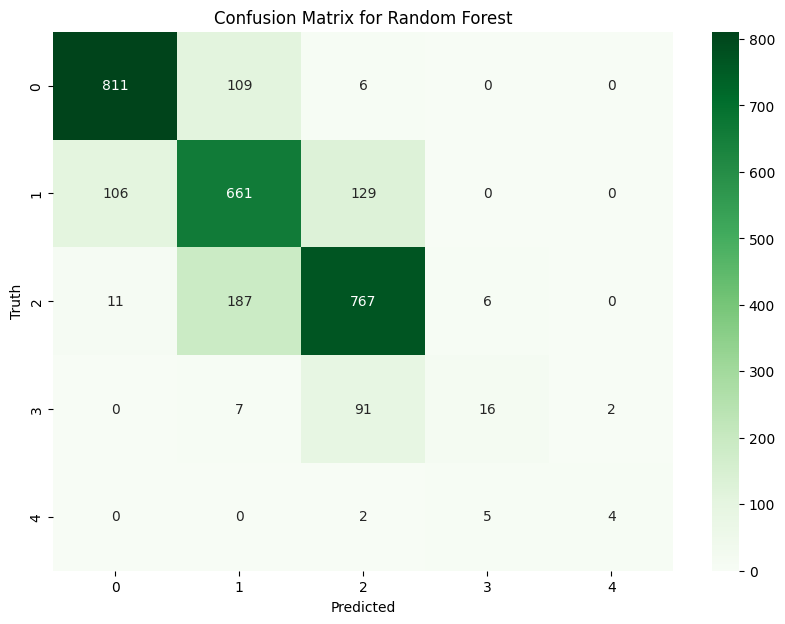

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt="d",cmap='Greens')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest')

In [10]:
from sklearn.metrics import precision_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_val_pred=model.predict(X_test)

print(precision_score(y_test,y_val_pred,average=None))

[0.87392241 0.68568465 0.77085427 0.59259259 0.66666667]


In [11]:
print(recall_score(y_test,y_val_pred,average=None))

[0.87580994 0.73772321 0.78990731 0.13793103 0.36363636]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_val_pred))

              precision    recall  f1-score   support

           1       0.87      0.88      0.87       926
           2       0.69      0.74      0.71       896
           3       0.77      0.79      0.78       971
           4       0.59      0.14      0.22       116
           5       0.67      0.36      0.47        11

    accuracy                           0.77      2920
   macro avg       0.72      0.58      0.61      2920
weighted avg       0.77      0.77      0.77      2920

